In [204]:
import numpy as np
import importlib
import scipy.optimize as sco
from scipy.optimize import minimize_scalar
%matplotlib notebook
import matplotlib.pyplot as plt
import streamingtools
import importlib
importlib.reload(streamingtools)
import monodisperseSI as mis
importlib.reload(mis)

<module 'monodisperseSI' from '/Users/fra/src/dustcontinuum/streamingtools/monodisperseSI.py'>

In [227]:
kx = np.logspace(0.0,5.0,1000)
Kz = 30.0
al = [0.0000001,0.00000001,0.000000001,0.0]
#al = [0.00002,0.000002,0.0000002,0.0]
Stokes=1.0/np.logspace(0,4,75)

growth=[]

for ial,alpha in enumerate(al):
    growthTmp = np.zeros(len(Stokes), dtype=np.complex)
    for ist,tau in enumerate(Stokes):
        temp = np.zeros((len(kx)), dtype=np.complex)
        for ix,Kx in enumerate(kx):
            mSI = mis.MonodisperseSISolver(taus=tau, epsilon=3,c=1.0)
            mSI.build_system_matrix(Kx, Kz)
            mSI.add_turbulence(alpha)
            mSI.solve_eigen()
            temp[ix] = mSI.get_fastest_growth().imag
        growthTmp[ist] = np.max(temp)
    growth.append(growthTmp)
    print((ial+1)*100/len(al),"%")

25.0 %
50.0 %
75.0 %
100.0 %


<IPython.core.display.Javascript object>


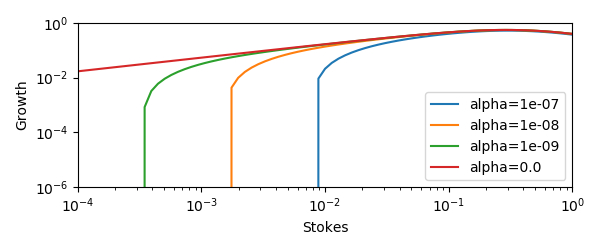

In [228]:
plt.figure(figsize=(6,2.5))
for alph,grow in zip(al,growth):
    plt.loglog(Stokes,grow,label="alpha="+str(alph))
plt.xlabel("Stokes")
plt.ylabel("Growth")
plt.xlim(1e-4,1e0)
plt.ylim(1e-6,1e0)
plt.tight_layout()
#plt.loglog(Stokes,growthNoAl.real,label="alpha=none")
plt.legend()
#plt.savefig("constKLinChen1.png")

In [229]:
kx = np.logspace(0.0,5.0,1000)
Kz = 30.0
al = [0.0000001,0.00000001,0.000000001,0.0]
#al = [0.00002,0.000002,0.0000002,0.0]
Stokes=1.0/np.logspace(0,4,75)

growth=[]

for ial,alpha in enumerate(al):
    growthTmp = np.zeros(len(Stokes), dtype=np.complex)
    for ist,tau in enumerate(Stokes):
        temp = np.zeros((len(kx)), dtype=np.complex)
        for ix,Kx in enumerate(kx):
            mSI = mis.MonodisperseSISolver(taus=tau, epsilon=0.3,c=1.0)
            mSI.build_system_matrix(Kx, Kz)
            mSI.add_turbulence(alpha)
            mSI.solve_eigen()
            temp[ix] = mSI.get_fastest_growth().imag
        growthTmp[ist] = np.max(temp)
    growth.append(growthTmp)
    print((ial+1)*100/len(al),"%")

25.0 %
50.0 %
75.0 %
100.0 %


<IPython.core.display.Javascript object>


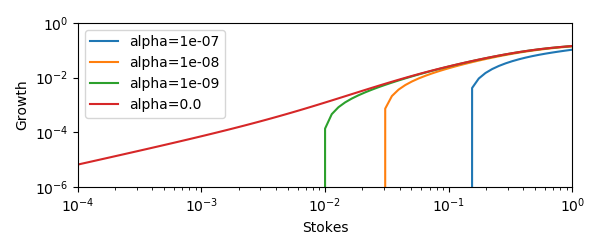

In [230]:
plt.figure(figsize=(6,2.5))
for alph,grow in zip(al,growth):
    plt.loglog(Stokes,grow,label="alpha="+str(alph))
plt.xlabel("Stokes")
plt.ylabel("Growth")
plt.xlim(1e-4,1e0)
plt.ylim(1e-6,1e0)
plt.tight_layout()
#plt.loglog(Stokes,growthNoAl.real,label="alpha=none")
plt.legend()
#plt.savefig("constKLinChen1.png")